### gather and format data

In [81]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.contrib.tensor_forest.python import tensor_forest
from tensorflow.python.ops import resources
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import h5py

df = pd.read_csv('sensors_walking.csv')
df.columns = ['1', '2', '3', '4', 'd1', 'd2', 'd3', 'd4', 'hours', 'minutes', 'seconds']

flow = pd.read_csv('flow_walking.csv')
flow.columns = ['Flow']

df.head()

,1,2,3,4,d1,d2,d3,d4,hours,minutes,seconds
0,0.731309,0.751686,0.728809,0.781483,0.105801,0.186839,0.294937,0.345199,10.0,50.0,1.139983
1,0.732341,0.753891,0.731525,0.785005,0.105907,0.188878,0.294519,0.346261,10.0,50.0,1.149434
2,0.733343,0.756291,0.734773,0.788314,0.105901,0.191718,0.297066,0.346372,10.0,50.0,1.158912
3,0.734314,0.758610,0.737137,0.791787,0.105788,0.194066,0.294488,0.347056,10.0,50.0,1.168432
4,0.735255,0.760844,0.740384,0.795052,0.105610,0.196003,0.297086,0.347001,10.0,50.0,1.177880


In [82]:
flow.head()

,Flow
0,3.012306
1,-12.605604
2,-8.539249
3,-10.130252
4,-7.973363


In [83]:
def movingAvg(Class, windowSize):
    """
    Create moving average to remove single outliers

    Args:
        Class (list): List of inhale / exhale classes
        Windowsize (int): Size of moving average window

    Returns:
        filteredClass (list): Filtered list of classes
    """
    
    filteredClass = []
    for i in range(0, len(Class)):

        if i < windowSize - 1:
            filteredClass.append(Class[i])

        elif Class[i] != Class[i - 1]:
            if sum(Class[i - (windowSize - 1):(i + 1)]) / windowSize > 1:
                filteredClass.append(2)

            elif sum(Class[i - (windowSize - 1):(i + 1)]) / windowSize < 1:
                filteredClass.append(0)

            else:
                filteredClass.append(Class[i])

        elif Class[i] == Class[i - 1]:
            filteredClass.append(Class[i])
            
    return filteredClass

def classSwitch(Class):
    """
    Class switch function to filter 3 classifiers down to 2 (inhale and exhale)

    Args:
        Class (list): List of inhale / exhale classes

    Returns:
        decisionClass (list): Filtered (with moving average) of resulting simplified class
    """

    decision = []
    for i in range(0, len(Class)):
        
        if Class[i] == 1:
            decision.append(1)
            
        elif Class[i] == 0:
            decision.append(0)
            
        elif Class[i] == 2:
            if len(decision) > 1:
                decision.append(decision[-1])
            else:
                decision.append(2)
            
    return movingAvg(decision, 3)

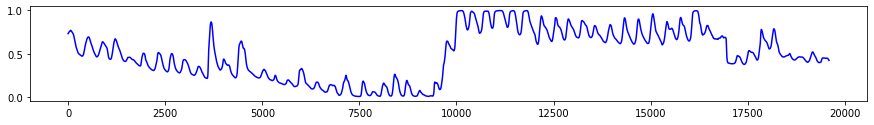

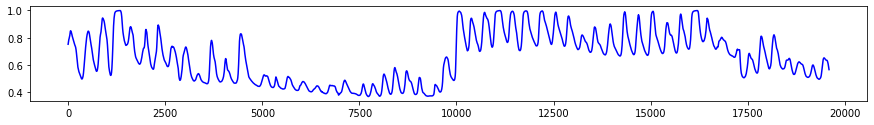

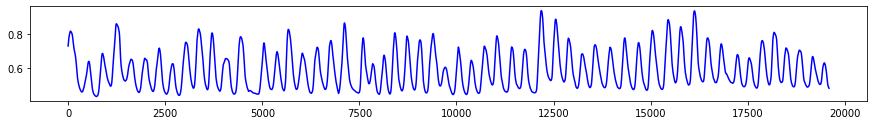

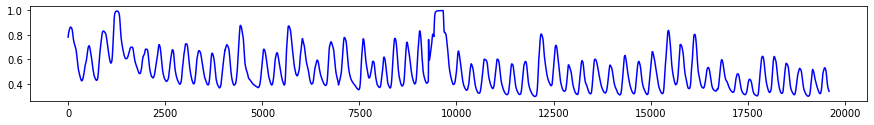

In [84]:
x = range(0, len(df))
fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,1)
plt.plot(x, df['1'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,2)
plt.plot(x, df['2'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,3)
plt.plot(x, df['3'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,4)
plt.plot(x, df['4'], 'b')
plt.show()

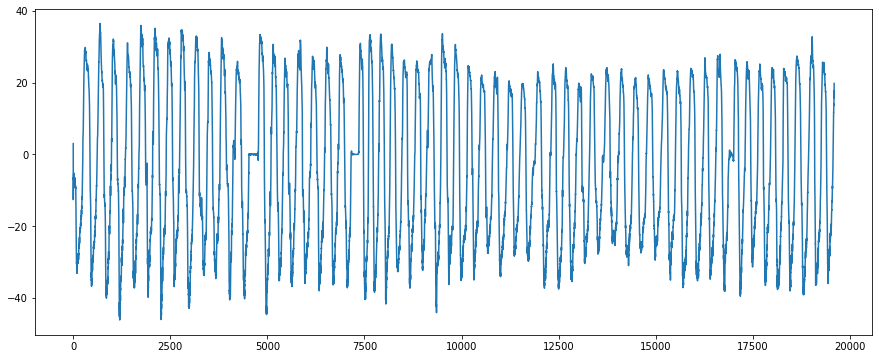

In [85]:
fig = plt.figure(figsize = (15, 6))
plt.plot(flow['Flow'])

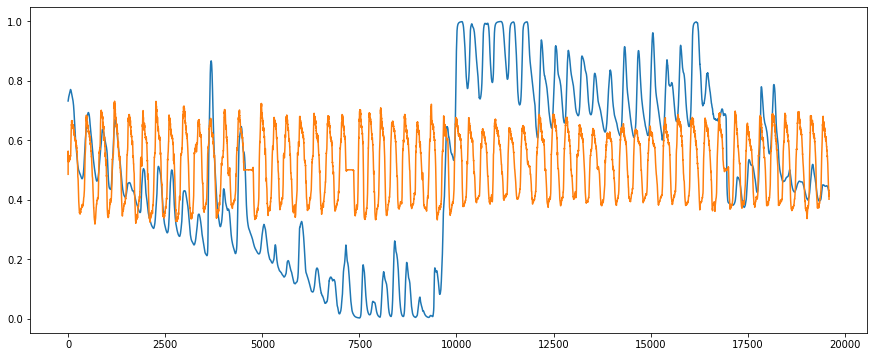

In [86]:
flow['a'] = (flow['Flow'] / 200) - 0.5
fig = plt.figure(figsize = (15, 6))
plt.plot(x, df['1'], x, flow['a']*-1)

In [87]:
flow.drop('a', inplace = True, axis = 1)

In [88]:
def label_fix(label):
    if label < -18:
        return 0
    elif label > 18:
        return 1
    else:
        return 2

df['Class'] = flow['Flow'].apply(label_fix)

In [89]:
df.head()

,1,2,3,4,d1,d2,d3,d4,hours,minutes,seconds,Class
0,0.731309,0.751686,0.728809,0.781483,0.105801,0.186839,0.294937,0.345199,10.0,50.0,1.139983,2
1,0.732341,0.753891,0.731525,0.785005,0.105907,0.188878,0.294519,0.346261,10.0,50.0,1.149434,2
2,0.733343,0.756291,0.734773,0.788314,0.105901,0.191718,0.297066,0.346372,10.0,50.0,1.158912,2
3,0.734314,0.758610,0.737137,0.791787,0.105788,0.194066,0.294488,0.347056,10.0,50.0,1.168432,2
4,0.735255,0.760844,0.740384,0.795052,0.105610,0.196003,0.297086,0.347001,10.0,50.0,1.177880,2


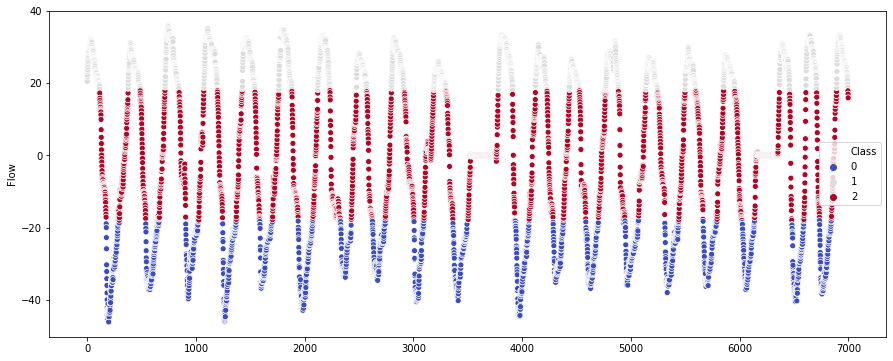

In [90]:
fig = plt.figure(figsize = (15, 6))
sns.scatterplot(y = flow['Flow'][1000:8000], x = range(0, 7000), hue = df['Class'][1000:8000], palette = 'coolwarm')

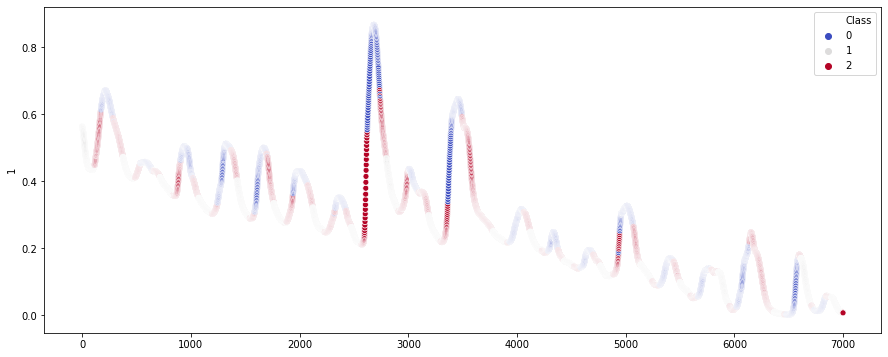

In [91]:
fig = plt.figure(figsize = (15, 6))
sns.scatterplot(y = df['1'][1000:8000], x = range(0, 7000), hue = df['Class'][1000:8000], palette = 'coolwarm')

In [92]:
df.head()

,1,2,3,4,d1,d2,d3,d4,hours,minutes,seconds,Class
0,0.731309,0.751686,0.728809,0.781483,0.105801,0.186839,0.294937,0.345199,10.0,50.0,1.139983,2
1,0.732341,0.753891,0.731525,0.785005,0.105907,0.188878,0.294519,0.346261,10.0,50.0,1.149434,2
2,0.733343,0.756291,0.734773,0.788314,0.105901,0.191718,0.297066,0.346372,10.0,50.0,1.158912,2
3,0.734314,0.758610,0.737137,0.791787,0.105788,0.194066,0.294488,0.347056,10.0,50.0,1.168432,2
4,0.735255,0.760844,0.740384,0.795052,0.105610,0.196003,0.297086,0.347001,10.0,50.0,1.177880,2


In [93]:
# Create the data matrix
X = df.drop('Class', axis = 1)
X.drop('hours', inplace = True, axis = 1)
X.drop('minutes', inplace = True, axis = 1)
X.drop('seconds', inplace = True, axis = 1)

# Create the classification matrix
y = df['Class']
y = pd.DataFrame(y, index = None, columns = ['Class'])

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_test.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)

In [94]:
len(X)

19595

### model training - deep learning

In [95]:
# Develop keras sequential model with optimized parameters through grid search cv
model = keras.Sequential()
model.add(keras.layers.Dense(150, activation = tf.nn.relu, input_dim = 8))
model.add(keras.layers.Dropout(0.3))
#model.add(keras.layers.Dense(125, activation = tf.nn.relu))
#model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(100, activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(50, activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(3, activation = tf.nn.softmax))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 150)               1350      
_________________________________________________________________
dropout_6 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               15100     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                

In [ ]:
EPOCHS = 2000
model.fit(X_train, y_train, epochs = EPOCHS)

Epoch 1/2000
13716/13716 [==============================] - 0s 35us/sample - loss: 0.7367 - acc: 0.6252
Epoch 2/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.6002 - acc: 0.7221
Epoch 3/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.5614 - acc: 0.7441
Epoch 4/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.5433 - acc: 0.7557
Epoch 5/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.5220 - acc: 0.7652
Epoch 6/2000
13716/13716 [==============================] - 0s 29us/sample - loss: 0.5106 - acc: 0.7710
Epoch 7/2000
13716/13716 [==============================] - 0s 30us/sample - loss: 0.4988 - acc: 0.7818
Epoch 8/2000
13716/13716 [==============================] - 0s 30us/sample - loss: 0.4888 - acc: 0.7845
Epoch 9/2000
13716/13716 [==============================] - 0s 30us/sample - loss: 0.4854 - acc: 0.7894
Epoch 10/2000
13716/13716 [==============================] - 0s 

13716/13716 [==============================] - 0s 27us/sample - loss: 0.2992 - acc: 0.8717
Epoch 80/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.2991 - acc: 0.8731
Epoch 81/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.2905 - acc: 0.8774
Epoch 82/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.2942 - acc: 0.8737
Epoch 83/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.2940 - acc: 0.8720
Epoch 84/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.2888 - acc: 0.8793
Epoch 85/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.2892 - acc: 0.8781
Epoch 86/2000
13716/13716 [==============================] - 0s 31us/sample - loss: 0.2896 - acc: 0.87670s - loss: 0.2900 - acc: 0.876
Epoch 87/2000
13716/13716 [==============================] - 0s 33us/sample - loss: 0.2844 - acc: 0.8806
Epoch 88/2000
13716/13716 [============

13716/13716 [==============================] - 0s 26us/sample - loss: 0.2532 - acc: 0.8919
Epoch 157/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.2530 - acc: 0.8977
Epoch 158/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.2471 - acc: 0.8961
Epoch 159/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.2495 - acc: 0.8978
Epoch 160/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.2532 - acc: 0.8936
Epoch 161/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.2495 - acc: 0.8955
Epoch 162/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.2562 - acc: 0.8950
Epoch 163/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.2524 - acc: 0.8965
Epoch 164/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.2546 - acc: 0.8949
Epoch 165/2000
13716/13716 [==============================] -

13716/13716 [==============================] - 0s 29us/sample - loss: 0.2353 - acc: 0.9057
Epoch 234/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.2334 - acc: 0.9036
Epoch 235/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.2308 - acc: 0.9057
Epoch 236/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.2277 - acc: 0.9044
Epoch 237/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.2228 - acc: 0.9059
Epoch 238/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.2287 - acc: 0.9070
Epoch 239/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.2208 - acc: 0.9116
Epoch 240/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.2265 - acc: 0.9065
Epoch 241/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.2272 - acc: 0.9068
Epoch 242/2000
13716/13716 [==============================] -

13716/13716 [==============================] - 0s 26us/sample - loss: 0.2122 - acc: 0.9145
Epoch 311/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.2058 - acc: 0.9159
Epoch 312/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.2220 - acc: 0.9101
Epoch 313/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.2146 - acc: 0.9113
Epoch 314/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.2153 - acc: 0.9136
Epoch 315/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.2151 - acc: 0.9127
Epoch 316/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.2106 - acc: 0.9105
Epoch 317/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.2217 - acc: 0.9120
Epoch 318/2000
13716/13716 [==============================] - 0s 31us/sample - loss: 0.2144 - acc: 0.9135
Epoch 319/2000
13716/13716 [==============================] -

13716/13716 [==============================] - 0s 27us/sample - loss: 0.2033 - acc: 0.9215
Epoch 388/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.2036 - acc: 0.9188
Epoch 389/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.2025 - acc: 0.9191
Epoch 390/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.1999 - acc: 0.9173
Epoch 391/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.2001 - acc: 0.9205
Epoch 392/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.2055 - acc: 0.9153
Epoch 393/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1984 - acc: 0.9189
Epoch 394/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.2041 - acc: 0.9182
Epoch 395/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1986 - acc: 0.9202
Epoch 396/2000
13716/13716 [==============================] -

13716/13716 [==============================] - 0s 29us/sample - loss: 0.2017 - acc: 0.9202
Epoch 465/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.1904 - acc: 0.9215
Epoch 466/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1915 - acc: 0.9218
Epoch 467/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.1991 - acc: 0.9243
Epoch 468/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.1961 - acc: 0.9222
Epoch 469/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.1903 - acc: 0.9235
Epoch 470/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1957 - acc: 0.9232
Epoch 471/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.1979 - acc: 0.9218
Epoch 472/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.2002 - acc: 0.9203
Epoch 473/2000
13716/13716 [==============================] -

13716/13716 [==============================] - 0s 30us/sample - loss: 0.1897 - acc: 0.9254
Epoch 542/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.1910 - acc: 0.9246
Epoch 543/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.1931 - acc: 0.9246
Epoch 544/2000
13716/13716 [==============================] - 0s 30us/sample - loss: 0.1832 - acc: 0.9272
Epoch 545/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1819 - acc: 0.9255
Epoch 546/2000
13716/13716 [==============================] - 0s 31us/sample - loss: 0.1891 - acc: 0.9276
Epoch 547/2000
13716/13716 [==============================] - 0s 31us/sample - loss: 0.1924 - acc: 0.9258
Epoch 548/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.1908 - acc: 0.9230
Epoch 549/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1861 - acc: 0.9260
Epoch 550/2000
13716/13716 [==============================] -

13716/13716 [==============================] - 0s 26us/sample - loss: 0.1893 - acc: 0.9245
Epoch 619/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1828 - acc: 0.9277
Epoch 620/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1936 - acc: 0.9234
Epoch 621/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1819 - acc: 0.9267
Epoch 622/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1880 - acc: 0.9237
Epoch 623/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1778 - acc: 0.9314
Epoch 624/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1886 - acc: 0.9261
Epoch 625/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1854 - acc: 0.9264
Epoch 626/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1789 - acc: 0.9288
Epoch 627/2000
13716/13716 [==============================] -

13716/13716 [==============================] - 0s 26us/sample - loss: 0.1824 - acc: 0.9284
Epoch 696/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1793 - acc: 0.9302
Epoch 697/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1828 - acc: 0.9259
Epoch 698/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.1830 - acc: 0.9281
Epoch 699/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1848 - acc: 0.9283
Epoch 700/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1810 - acc: 0.9287
Epoch 701/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1823 - acc: 0.9289
Epoch 702/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1775 - acc: 0.9288
Epoch 703/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1733 - acc: 0.9302
Epoch 704/2000
13716/13716 [==============================] -

13716/13716 [==============================] - 0s 27us/sample - loss: 0.1812 - acc: 0.9283
Epoch 773/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.1709 - acc: 0.9329
Epoch 774/2000
13716/13716 [==============================] - 0s 29us/sample - loss: 0.1716 - acc: 0.9288
Epoch 775/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1784 - acc: 0.9304
Epoch 776/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1810 - acc: 0.9304
Epoch 777/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.1774 - acc: 0.9318
Epoch 778/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1737 - acc: 0.9322
Epoch 779/2000
13716/13716 [==============================] - 0s 29us/sample - loss: 0.1689 - acc: 0.9335
Epoch 780/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1793 - acc: 0.9294
Epoch 781/2000
13716/13716 [==============================] -

13716/13716 [==============================] - 0s 26us/sample - loss: 0.1652 - acc: 0.9339
Epoch 850/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1703 - acc: 0.9343
Epoch 851/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1733 - acc: 0.9334
Epoch 852/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1711 - acc: 0.9343
Epoch 853/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1771 - acc: 0.9299
Epoch 854/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1683 - acc: 0.9334
Epoch 855/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.1651 - acc: 0.9356
Epoch 856/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1721 - acc: 0.9313
Epoch 857/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1760 - acc: 0.9280
Epoch 858/2000
13716/13716 [==============================] -

13716/13716 [==============================] - 0s 27us/sample - loss: 0.1646 - acc: 0.9364
Epoch 927/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1718 - acc: 0.9331
Epoch 928/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1698 - acc: 0.9358
Epoch 929/2000
13716/13716 [==============================] - 0s 29us/sample - loss: 0.1693 - acc: 0.9347
Epoch 930/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1657 - acc: 0.9358
Epoch 931/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1634 - acc: 0.9331
Epoch 932/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1622 - acc: 0.9388
Epoch 933/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1666 - acc: 0.9326
Epoch 934/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1782 - acc: 0.9334
Epoch 935/2000
13716/13716 [==============================] -

13716/13716 [==============================] - 0s 26us/sample - loss: 0.1729 - acc: 0.9337
Epoch 1004/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1720 - acc: 0.9321
Epoch 1005/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1672 - acc: 0.9365
Epoch 1006/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1689 - acc: 0.9321
Epoch 1007/2000
13716/13716 [==============================] - 0s 29us/sample - loss: 0.1653 - acc: 0.9355
Epoch 1008/2000
13716/13716 [==============================] - 0s 33us/sample - loss: 0.1806 - acc: 0.9287
Epoch 1009/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1679 - acc: 0.9382
Epoch 1010/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1658 - acc: 0.9373
Epoch 1011/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1707 - acc: 0.9319
Epoch 1012/2000
13716/13716 [========================

13716/13716 [==============================] - 0s 27us/sample - loss: 0.1539 - acc: 0.9378
Epoch 1080/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1576 - acc: 0.9398
Epoch 1081/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1672 - acc: 0.9353
Epoch 1082/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.1702 - acc: 0.9338
Epoch 1083/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1668 - acc: 0.9361
Epoch 1084/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.1656 - acc: 0.9352
Epoch 1085/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1596 - acc: 0.9380
Epoch 1086/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1613 - acc: 0.9399
Epoch 1087/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1712 - acc: 0.9345
Epoch 1088/2000
13716/13716 [========================

13716/13716 [==============================] - 0s 26us/sample - loss: 0.1658 - acc: 0.9361
Epoch 1156/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1655 - acc: 0.9334
Epoch 1157/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.1682 - acc: 0.9372
Epoch 1158/2000
13716/13716 [==============================] - 0s 35us/sample - loss: 0.1593 - acc: 0.9372
Epoch 1159/2000
13716/13716 [==============================] - 0s 29us/sample - loss: 0.1620 - acc: 0.9364
Epoch 1160/2000
13716/13716 [==============================] - 0s 31us/sample - loss: 0.1649 - acc: 0.9345
Epoch 1161/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1701 - acc: 0.9353
Epoch 1162/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1605 - acc: 0.9382
Epoch 1163/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1629 - acc: 0.9348
Epoch 1164/2000
13716/13716 [========================

13716/13716 [==============================] - 0s 28us/sample - loss: 0.1575 - acc: 0.9388
Epoch 1232/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1574 - acc: 0.9372
Epoch 1233/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1581 - acc: 0.9374
Epoch 1234/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1555 - acc: 0.9379
Epoch 1235/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1693 - acc: 0.9365
Epoch 1236/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1614 - acc: 0.9371
Epoch 1237/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1571 - acc: 0.9391
Epoch 1238/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1593 - acc: 0.9383
Epoch 1239/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1613 - acc: 0.9372
Epoch 1240/2000
13716/13716 [========================

13716/13716 [==============================] - 0s 27us/sample - loss: 0.1612 - acc: 0.9377
Epoch 1308/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1575 - acc: 0.9400
Epoch 1309/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1592 - acc: 0.9362
Epoch 1310/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1572 - acc: 0.9409
Epoch 1311/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1615 - acc: 0.9398
Epoch 1312/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1522 - acc: 0.9397
Epoch 1313/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1561 - acc: 0.9418
Epoch 1314/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1617 - acc: 0.9381
Epoch 1315/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1593 - acc: 0.9373
Epoch 1316/2000
13716/13716 [========================

13716/13716 [==============================] - 0s 27us/sample - loss: 0.1554 - acc: 0.9420
Epoch 1384/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1652 - acc: 0.9376
Epoch 1385/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1492 - acc: 0.9397
Epoch 1386/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1584 - acc: 0.9383
Epoch 1387/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1612 - acc: 0.9374
Epoch 1388/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1549 - acc: 0.9395
Epoch 1389/2000
13716/13716 [==============================] - 0s 29us/sample - loss: 0.1550 - acc: 0.9393
Epoch 1390/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1629 - acc: 0.9369
Epoch 1391/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1559 - acc: 0.9381
Epoch 1392/2000
13716/13716 [========================

13716/13716 [==============================] - 0s 28us/sample - loss: 0.1539 - acc: 0.9412
Epoch 1460/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1566 - acc: 0.9421
Epoch 1461/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1492 - acc: 0.9394
Epoch 1462/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1600 - acc: 0.9373
Epoch 1463/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1524 - acc: 0.9412
Epoch 1464/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.1593 - acc: 0.9412
Epoch 1465/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.1550 - acc: 0.9394
Epoch 1466/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1573 - acc: 0.9380
Epoch 1467/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.1539 - acc: 0.9409
Epoch 1468/2000
13716/13716 [========================

13716/13716 [==============================] - 0s 26us/sample - loss: 0.1486 - acc: 0.9412
Epoch 1536/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1591 - acc: 0.9387
Epoch 1537/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1601 - acc: 0.9369
Epoch 1538/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1529 - acc: 0.9364
Epoch 1539/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1625 - acc: 0.9365
Epoch 1540/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1625 - acc: 0.9377
Epoch 1541/2000
13716/13716 [==============================] - 0s 30us/sample - loss: 0.1554 - acc: 0.9407
Epoch 1542/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1475 - acc: 0.9445
Epoch 1543/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1494 - acc: 0.9437
Epoch 1544/2000
13716/13716 [========================

In [ ]:
# Scoring the model on testing data from same dataset
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

prediction = model.predict(X_test)

final_pred = []
for score in range(0, len(prediction)):
    final_pred.append(np.argmax(prediction[score]))
    
print(classification_report(y_test, final_pred))
print(confusion_matrix(y_test, final_pred))
Predictions = classSwitch(final_pred)
Class = classSwitch(list(y_test['Class']))
print('Keras Model')
print("\n")
print(classification_report(Class, Predictions))

In [ ]:
#export_csv = pd.DataFrame(X_test).to_csv(r'/Users/mikefurr/Documents/GitHub/coral_host/Jupyter_Notebooks/X_test.csv', header = True, index = None)

In [ ]:
#coral_results = pd.read_csv('coral_results.csv')

In [ ]:
#print(classification_report(y_test, coral_results))

### model training - tensorflow random forest

### model training - random forest

In [ ]:
import timeit

In [ ]:
print(" Random Forest ... ")

start = timeit.default_timer()
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5000)
rf_model = classifier.fit(X_train, y_train)
predictions = rf_model.predict(X_test)
end = timeit.default_timer()

print(" accuracy = ", accuracy_score(y_test, predictions), " time = ", end - start)
print(confusion_matrix(y_test, predictions))
print("\n")

print("Random Forest")
print(classification_report(y_test, predictions))

In [ ]:
Predictions = classSwitch(predictions)
Class = classSwitch(list(y_test['Class']))
print('Random Forest')
print("\n")
print(classification_report(Class, Predictions))

### model testing on new data

In [ ]:
df_test = pd.read_csv('sensors_1.csv')
df_test.columns = ['1', '2', '3', '4', 'd1', 'd2', 'd3', 'd4', 'hours', 'minutes', 'seconds']

flow_test = pd.read_csv('Flow_1.csv')
flow_test.columns = ['Flow']

In [ ]:
df_test['Class'] = flow_test['Flow'].apply(label_fix)

In [ ]:
x = range(0, len(df_test))
fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,1)
plt.plot(x, df_test['1'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,2)
plt.plot(x, df_test['2'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,3)
plt.plot(x, df_test['3'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,4)
plt.plot(x, df_test['4'], 'b')
plt.show()

In [ ]:
fig = plt.figure(figsize = (15, 6))
plt.plot(flow_test['Flow'])

In [ ]:
flow_test['a'] = (flow_test['Flow'] / 150) - 0.5
fig = plt.figure(figsize = (20, 10))
plt.plot(x, df_test['1'], x, flow_test['a']*-1)

In [ ]:
flow_test.drop('a', inplace = True, axis = 1)

In [ ]:
fig = plt.figure(figsize = (15, 6))
sns.scatterplot(y = flow_test['Flow'][1000:6000], x = range(0, 5000), hue = df_test['Class'][1000:6000], palette = 'coolwarm')

In [ ]:
fig = plt.figure(figsize = (15, 6))
sns.scatterplot(y = df_test['1'][1000:6000]*-1, x = range(0, 5000), hue = df_test['Class'][1000:6000], palette = 'coolwarm')

In [ ]:
test_sensors = df_test.drop('Class', axis = 1)
test_sensors.drop('hours', inplace = True, axis = 1)
test_sensors.drop('minutes', inplace = True, axis = 1)
test_sensors.drop('seconds', inplace = True, axis = 1)

# Create the classification matrix
test_class = df_test['Class']
test_class = pd.DataFrame(test_class, index = None, columns = ['Class'])

#### model testing - random forest

In [ ]:
test_predictions = rf_model.predict(test_sensors)
print(" accuracy = ", accuracy_score(test_class, test_predictions))
print(confusion_matrix(test_class, test_predictions))
print("\n")

print('Random Forest - Testing')
print('\n')
print(classification_report(test_class, test_predictions))

In [ ]:
testPredictions = classSwitch(test_predictions)
testClass = classSwitch(list(test_class['Class']))
print('Random Forest - Testing')
print('\n')
print(classification_report(testClass, testPredictions))

### model testing - deep learning

In [ ]:
test_predictions = model.predict(test_sensors)

final_pred_test = []
for score in range(0, len(test_predictions)):
    final_pred_test.append(np.argmax(test_predictions[score]))

print('Keras Model - Testing')
print('\n')
print(classification_report(test_class, final_pred_test))

In [ ]:
testPredictions = classSwitch(final_pred_test)
testClass = classSwitch(list(test_class['Class']))
print('Keras Model - Testing')
print('\n')
print(classification_report(testClass, testPredictions))

In [ ]:
fig = plt.figure(figsize = (15, 6))
sns.scatterplot(y = flow_test['Flow'][1000:5000], x = range(0, 4000), hue = final_pred_test[1000:5000], palette = 'coolwarm')

In [ ]:
# Looking at where either model fails
#test_class['score'] = test_class['Class'] == final_pred_test
#fig = plt.figure(figsize = (15, 6))
#sns.scatterplot(y = flow_test['Flow'][1000:], x = range(0, ), hue = test_class['score'][1000:])

#### Save TFLite Model

In [ ]:
#keras_file = "walking_model.h5"
#keras.models.save_model(model, keras_file)
#converter = tf.lite.TocoConverter.from_keras_model_file('walking_model.h5')
#tflite_model = converter.convert()
#open("walking_model.tflite", "wb").write(tflite_model)